In [1]:
import pandas as pd
import re
import nltk
from nltk import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
from nltk.corpus import wordnet
from wordcloud import WordCloud
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from collections import Counter
import datetime
from many_stop_words import get_stop_words
import os
import glob
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\august\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [5]:
os.chdir("Pozyskane_dane")

In [6]:
filename = 'do_uzycia2.csv'
dataset = pd.read_csv(filename, delimiter=",")

In [7]:
dataset

,index,Tytul,Autor,Komentarze,Data,Spolka
0,1,Kiedy ruszy sprzdaz testow na Covid firmy Geno...,~Pytanie,4,2021-03-27 14:50:00,GENOMTEC
1,2,Nie dotykać i omijać na razie te akcje,~Karol,2,2021-03-27 13:43:00,GENOMTEC
2,3,Kwarantanna na akcje,~Jakotako,3,2021-03-27 11:06:00,GENOMTEC
3,4,Knf,~Paweł,7,2021-03-27 07:54:00,GENOMTEC
4,5,WAŻNE!!! Proszę korzystać z funkcji „zgłoś do ...,~Admin,5,2021-03-27 07:35:00,GENOMTEC
...,...,...,...,...,...,...
53188,1,Wycena Gamivo,~Honestly,4,2021-04-23 09:48:00,GAMIVO
53189,2,co muslicie o powstaniu polskiej superligi -to...,~jedrek,1,2021-04-22 18:03:00,GAMIVO
53190,3,"Rękę w górę kto zarobiony, brał ktos na lewar?",~Wydmucha,3,2021-04-22 12:24:00,GAMIVO
53191,4,"Dzisiaj debiut Gamivo, spółki wycenianej 100% ...",~Gamivo,3,2021-04-22 11:12:00,GAMIVO


In [8]:
dataset = dataset.drop_duplicates(subset='Tytul', keep="first")

In [9]:
dataset

,index,Tytul,Autor,Komentarze,Data,Spolka
0,1,Kiedy ruszy sprzdaz testow na Covid firmy Geno...,~Pytanie,4,2021-03-27 14:50:00,GENOMTEC
1,2,Nie dotykać i omijać na razie te akcje,~Karol,2,2021-03-27 13:43:00,GENOMTEC
2,3,Kwarantanna na akcje,~Jakotako,3,2021-03-27 11:06:00,GENOMTEC
3,4,Knf,~Paweł,7,2021-03-27 07:54:00,GENOMTEC
4,5,WAŻNE!!! Proszę korzystać z funkcji „zgłoś do ...,~Admin,5,2021-03-27 07:35:00,GENOMTEC
...,...,...,...,...,...,...
53188,1,Wycena Gamivo,~Honestly,4,2021-04-23 09:48:00,GAMIVO
53189,2,co muslicie o powstaniu polskiej superligi -to...,~jedrek,1,2021-04-22 18:03:00,GAMIVO
53190,3,"Rękę w górę kto zarobiony, brał ktos na lewar?",~Wydmucha,3,2021-04-22 12:24:00,GAMIVO
53191,4,"Dzisiaj debiut Gamivo, spółki wycenianej 100% ...",~Gamivo,3,2021-04-22 11:12:00,GAMIVO


In [10]:
def clean_data(dataframe):
   
    dataframe['clean_data'] = dataframe.Tytul.apply(str)
    
    # usuwanie znaków specjalnych
    dataframe.clean_data = dataframe.clean_data.map(lambda x: re.sub(r"[^a-zA-Z#ęóąśłżźćńĘÓĄŚŁŻŹĆŃ]", ' ', x))
    # zmiana na małe litery
    dataframe.clean_data = dataframe.clean_data.map(lambda x: x.lower())
    #usuwanie zaimków, przyimków itd.
    stop_words = get_stop_words('pl')
    for i in range(len(dataframe.clean_data)):
        tokens = word_tokenize(dataframe.clean_data[i])
        clean_tokens = [w for w in tokens if w not in stop_words]
        dataframe.clean_data[i] = clean_tokens


In [11]:
clean_data(dataset)

<ipython-input-10-1bbe3d43aa1e>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe.clean_data[i] = clean_tokens


In [12]:
dataset.clean_data[45]

['zaraz', 'zrzut', 'tys', 'szt', 'pkc', 'zł', 'pewne']

In [13]:
def lemmatize_data(dataset):
    
    for i in range(len(dataset)):
        # Pos-tag 
        for word in [dataset[i]]:
            pos_tag_list = nltk.pos_tag(word)
        wordnet_tags = []
        for j in pos_tag_list:
            # Adjective
            if j[1].startswith('J'):
                wordnet_tags.append(wordnet.ADJ)
            # Noun
            elif j[1].startswith('N'):
                wordnet_tags.append(wordnet.NOUN)
            # Adverb
            elif j[1].startswith('R'):
                wordnet_tags.append(wordnet.ADV)
            # Verb
            elif j[1].startswith('V'):
                wordnet_tags.append(wordnet.VERB)
            # Noun
            else:
                wordnet_tags.append(wordnet.NOUN)
        lem_words = []
        for k in range(len(dataset[i])):
            lem_words.append(lemmatizer.lemmatize(dataset[i][k], pos=wordnet_tags[k]))
        lem_data = ' '.join(lem_words)
        dataset[i] = lem_data

In [14]:
lemmatize_data(dataset.clean_data)
dataset.head(40)

<ipython-input-13-ee0c9fa11bc6>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset[i] = lem_data


,index,Tytul,Autor,Komentarze,Data,Spolka,clean_data
0,1,Kiedy ruszy sprzdaz testow na Covid firmy Geno...,~Pytanie,4,2021-03-27 14:50:00,GENOMTEC,ruszy sprzdaz testow covid firmy genomtec
1,2,Nie dotykać i omijać na razie te akcje,~Karol,2,2021-03-27 13:43:00,GENOMTEC,dotykać omijać razie akcje
2,3,Kwarantanna na akcje,~Jakotako,3,2021-03-27 11:06:00,GENOMTEC,kwarantanna akcje
3,4,Knf,~Paweł,7,2021-03-27 07:54:00,GENOMTEC,knf
4,5,WAŻNE!!! Proszę korzystać z funkcji „zgłoś do ...,~Admin,5,2021-03-27 07:35:00,GENOMTEC,ważne proszę korzystać funkcji zgłoś moderatora
5,6,Ogladaliscie gambit krolowej ?,~Profesor,3,2021-03-26 22:37:00,GENOMTEC,ogladaliscie gambit krolowej
6,7,Leszcze i jak tam wasza kiszonka,~Genek,8,2021-03-26 22:35:00,GENOMTEC,leszcze kiszonka
7,8,DWA 2 PYTANIA ; 1/NA JAKIE INFO CZEKAMY .2/DLA...,~JAKJEST,2,2021-03-26 22:33:00,GENOMTEC,pytania info czekamy miało dalej spada
8,9,A to ciekawe,malinowy78,1,2021-03-26 21:28:00,GENOMTEC,ciekawe
9,10,Takie same teksty czytałem na seriniusie,~Gekon,2,2021-03-26 21:01:00,GENOMTEC,same teksty czytałem seriniusie


In [15]:
#Połączenie wszystkich wpisów w 1 stringa
all_words_string = ' '.join([Tytul for Tytul in dataset.clean_data])
all_words_list = all_words_string.split()

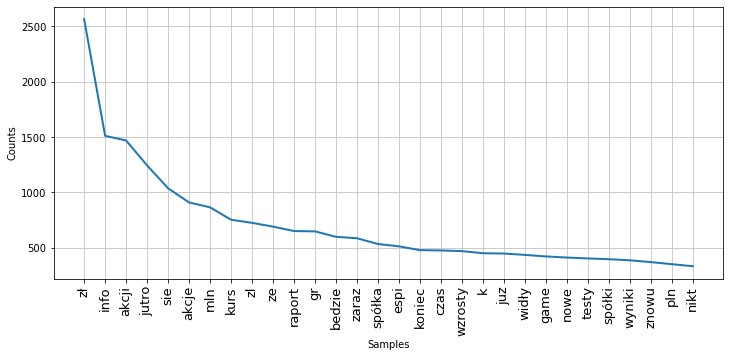

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [16]:
plt.figure(figsize=(12,5))
plt.xticks(fontsize=13, rotation=90)
freq_dist = nltk.FreqDist(all_words_list)
freq_dist.plot(30,cumulative=False)

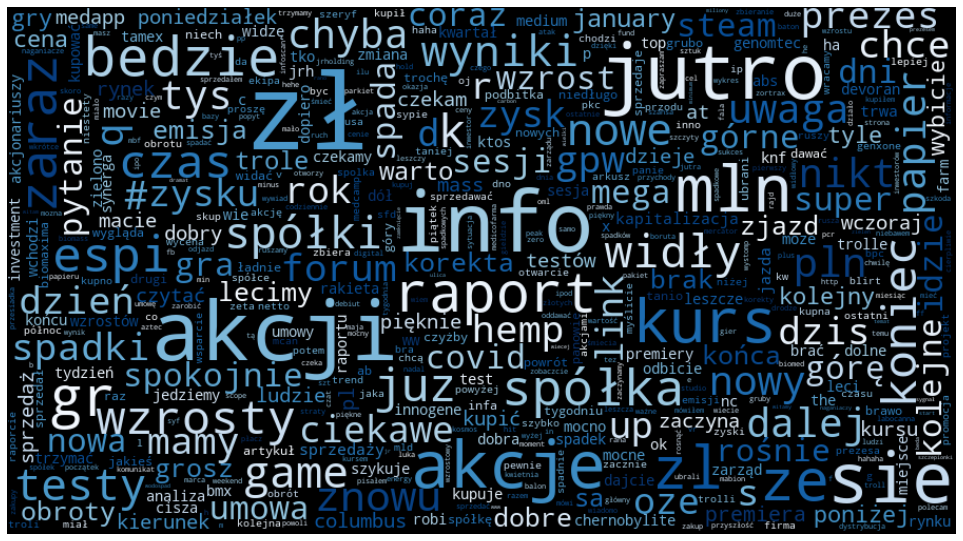

In [17]:
# Częstotliwość występowania słów

wordcloud = WordCloud(width=900,
                      height=500,
                      max_words=500,
                      max_font_size=100,
                      relative_scaling=0.5,
                      colormap='Blues',
                      normalize_plurals=True).generate_from_frequencies(freq_dist)
plt.figure(figsize=(17,14))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [18]:
#usuwanie niepotrzebnych slow
def finish_cleaning(dataframe):
    dataframe.clean_data = dataframe.clean_data.map(lambda x: x.replace('zł',''))
    dataframe.clean_data = dataframe.clean_data.map(lambda x: x.replace('zl',''))
    dataframe.clean_data = dataframe.clean_data.map(lambda x: x.replace('gr',''))
    dataframe.clean_data = dataframe.clean_data.map(lambda x: x.replace('#',''))
    dataframe.clean_data = dataframe.clean_data.map(lambda x: x.replace('pln',''))

In [19]:
finish_cleaning(dataset)

In [20]:
#Połączenie wszystkich wpisów w 1 stringa
all_words_string = ' '.join([Tytul for Tytul in dataset.clean_data])
all_words_list = all_words_string.split()

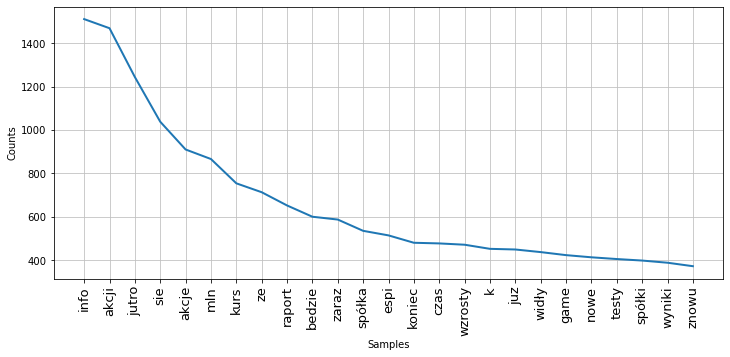

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [21]:
plt.figure(figsize=(12,5))
plt.xticks(fontsize=13, rotation=90)
freq_dist = nltk.FreqDist(all_words_list)
freq_dist.plot(25,cumulative=False)

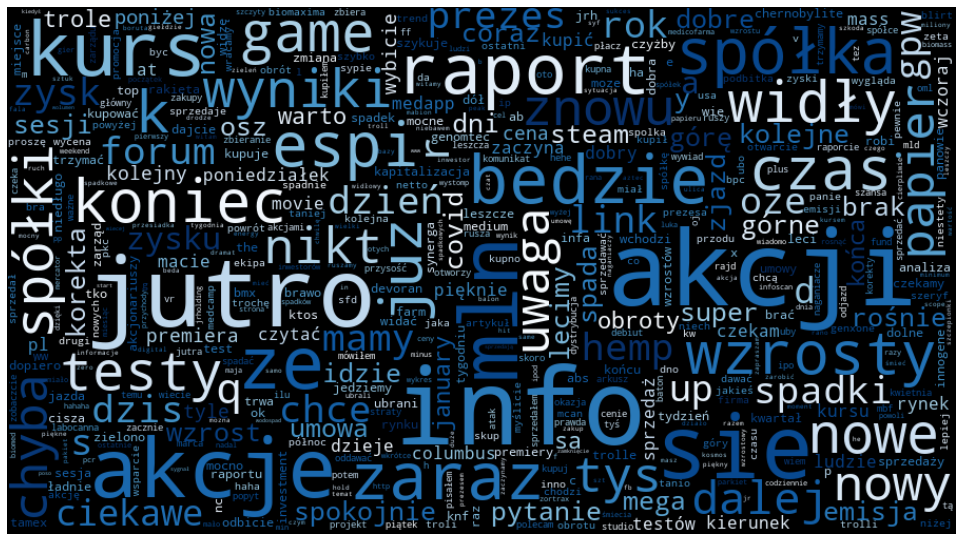

In [22]:
wordcloud = WordCloud(width=900,
                      height=500,
                      max_words=500,
                      max_font_size=100,
                      relative_scaling=0.5,
                      colormap='Blues',
                      normalize_plurals=True).generate_from_frequencies(freq_dist)
plt.figure(figsize=(17,14))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# Najpopularniejsze slowa

In [23]:
word_freq = nltk.FreqDist(all_words_list)
freq_df = pd.DataFrame({'Word': list(word_freq.keys()), 'Count': list(word_freq.values())}).sort_values(by=['Count'], ascending=False)
freq_df.head(40)

,Word,Count
24,info,1511
107,akcji,1469
232,jutro,1244
276,sie,1038
9,akcje,910
455,mln,866
113,kurs,754
196,ze,713
1762,raport,652
58,bedzie,600


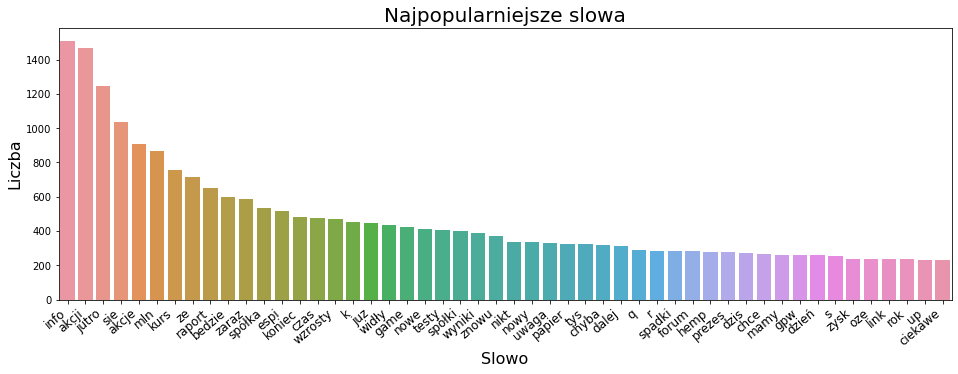

In [24]:
freq_df = freq_df.nlargest(columns="Count", n = 50) 
plt.figure(figsize=(16,5))
ax = sns.barplot(data=freq_df, x= "Word", y = "Count")
ax.set_ylabel('Liczba', fontsize=16)
ax.set_xlabel('Slowo', fontsize=16)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right", fontsize=12)
ax.set_title("Najpopularniejsze slowa", fontsize=20)
plt.show()

In [25]:
dataset.Data = pd.to_datetime(dataset.Data)

In [26]:
# Grupowanie postów po godzinie wpisu

hour_df = pd.DataFrame(dataset.groupby(dataset['Data'].dt.hour)['clean_data'].count()).reset_index()
hour_df = hour_df.rename(columns={'Data': 'Hour', 'clean_tweet': 'Count'})
hour_df.Hour = hour_df.Hour.replace([1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0,0.0], ['1:00', '2:00', '3:00', '4:00', '5:00', '6:00', '7:00', '8:00', '9:00', '10:00', '11:00', '12:00', '13:00', '14:00', '15:00', '16:00', '17:00', '18:00', '19:00', '20:00', '21:00', '22:00', '23:00','24:00'])
hour_df

,Hour,clean_data
0,24:00,822
1,1:00,340
2,2:00,154
3,3:00,86
4,4:00,89
5,5:00,195
6,6:00,479
7,7:00,1207
8,8:00,2420
9,9:00,4542


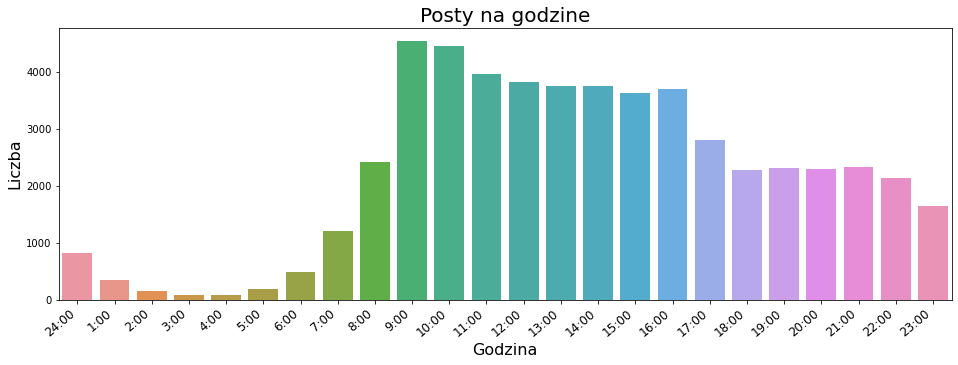

In [27]:
#Histogram postów na godzine

plt.figure(figsize=(16,5))
ax = sns.barplot(data=hour_df, x= "Hour", y = "clean_data")
ax.set_ylabel('Liczba', fontsize=16)
ax.set_xlabel('Godzina', fontsize=16)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right", fontsize=12)
ax.set_title("Posty na godzine", fontsize=20)
plt.show()

# Posty w dni tygodnia

In [28]:
dni = pd.DataFrame(dataset.groupby(dataset['Data'].dt.weekday)['clean_data'].count()).reset_index()
dni = dni.rename(columns={'Data': 'Day', 'clean_data': 'Count'})
dni.Day = dni.Day.replace([0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0], ['Poniedziałek', 'Wtorek', 'Środa', 'Czwartek', 'Piątek', 'Sobota', 'Niedziela'])
dni


,Day,Count
0,Poniedziałek,8918
1,Wtorek,9630
2,Środa,9738
3,Czwartek,9945
4,Piątek,9178
5,Sobota,2786
6,Niedziela,2998


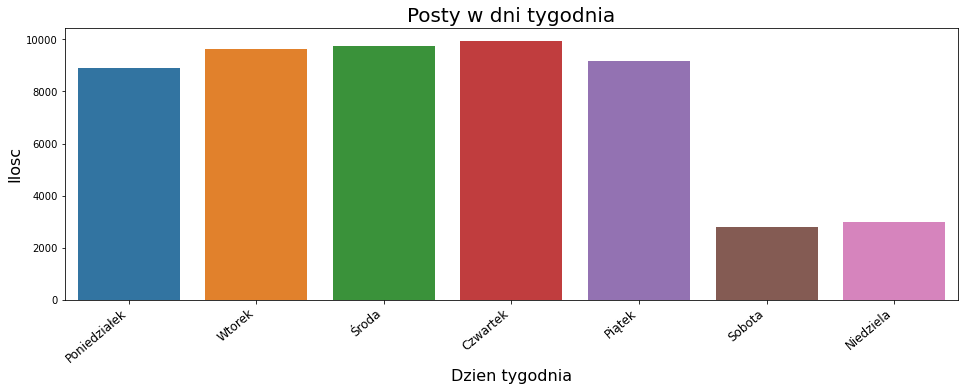

In [29]:
plt.figure(figsize=(16,5))
ax = sns.barplot(data=dni, x= "Day", y = "Count")
ax.set_ylabel('Ilosc', fontsize=16)
ax.set_xlabel('Dzien tygodnia', fontsize=16)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right", fontsize=12)
ax.set_title("Posty w dni tygodnia", fontsize=20)
plt.show()

# najpopularniejsza spółka

In [30]:
company_df = pd.DataFrame(dataset.groupby(dataset['Spolka'])['Tytul'].count()).reset_index().sort_values(by=['Tytul'], ascending=False)
company_df = company_df.rename(columns={'Spolka': 'Spolka', 'Tytul': 'ilosc postow'})
company_df = company_df.head(30)
company_df 

,Spolka,ilosc postow
19,FARM51,2256
7,BIOMAXIMA,2104
30,INNOGENE,1744
34,LABOCANNA,1715
53,SYNERGA,1710
16,DEVORAN,1576
27,HEMP,1544
0,4MASS,1526
28,HUBTECH,1463
50,SOLARINOV,1362


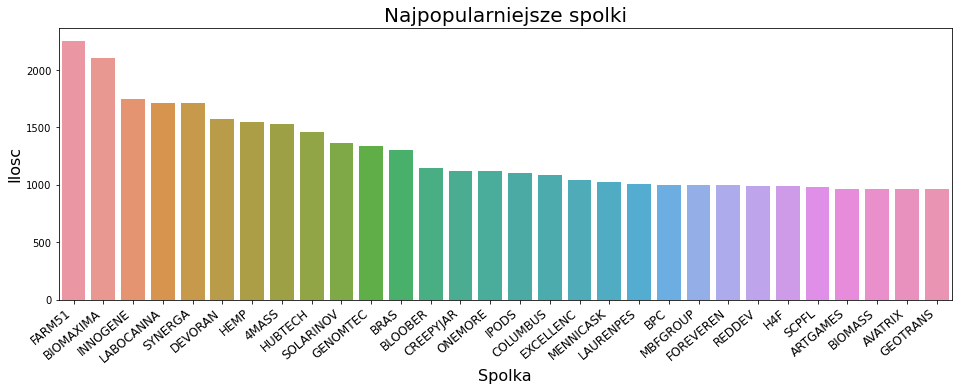

In [31]:
plt.figure(figsize=(16,5))
ax = sns.barplot(data=company_df, x= "Spolka", y = "ilosc postow")
ax.set_ylabel('Ilosc', fontsize=16)
ax.set_xlabel('Spolka', fontsize=16)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right", fontsize=12)
ax.set_title("Najpopularniejsze spolki", fontsize=20)
plt.show()

# Najpopularniejszy autor

In [32]:
autor_df = pd.DataFrame(dataset.groupby(dataset['Autor'])['Tytul'].count()).reset_index().sort_values(by=['Tytul'], ascending=False)
autor_df = autor_df.rename(columns={'Autor': 'Autor', 'Tytul': 'ilosc postow'})
autor_df = autor_df.head(25)

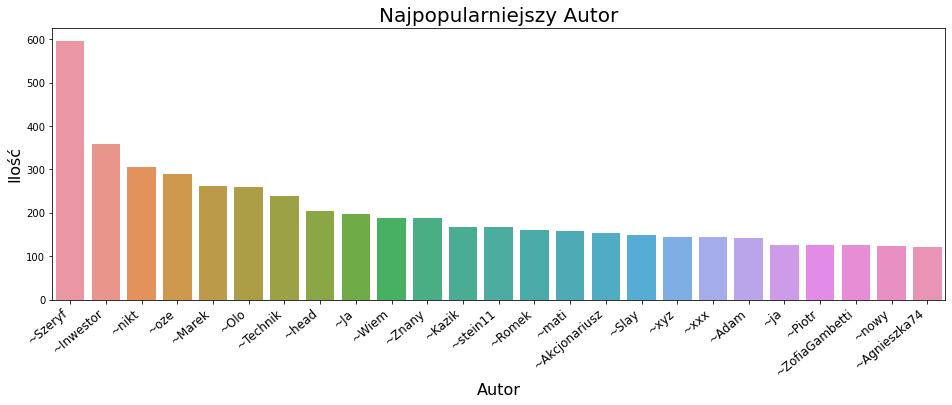

In [33]:
plt.figure(figsize=(16,5))
ax = sns.barplot(data=autor_df, x= "Autor", y = "ilosc postow")
ax.set_ylabel('Ilość', fontsize=16)
ax.set_xlabel('Autor', fontsize=16)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right", fontsize=12)
ax.set_title("Najpopularniejszy Autor", fontsize=20)
plt.show()

## Gdzie najchętniej udziela się Szeryf

In [34]:
Szeryf = dataset [dataset['Autor'] == '~Szeryf']
Szeryf_df = pd.DataFrame(Szeryf.groupby(dataset['Spolka'])['Autor'].count()).reset_index().sort_values(by=['Autor'], ascending=False)
Szeryf_df 

,Spolka,Autor
2,SYNERGA,595
0,FARM51,1
1,JRHOLDING,1


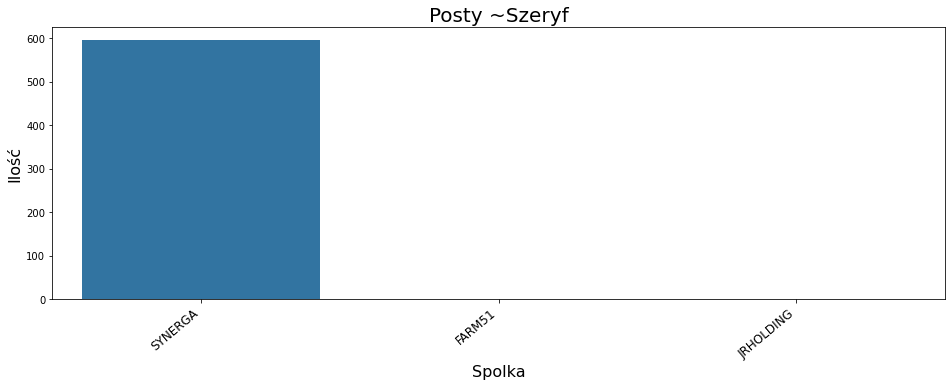

In [35]:
plt.figure(figsize=(16,5))
ax = sns.barplot(data=Szeryf_df, x= "Spolka", y = "Autor")
ax.set_ylabel('Ilość', fontsize=16)
ax.set_xlabel('Spolka', fontsize=16)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right", fontsize=12)
ax.set_title("Posty ~Szeryf", fontsize=20)
plt.show()

In [36]:
szeryff_df = pd.DataFrame(Szeryf.groupby(Szeryf['Data'].dt.weekday)['clean_data'].count()).reset_index()
szeryff_df = szeryff_df.rename(columns={'Data': 'Day', 'clean_data': 'Count'})
szeryff_df.Day = szeryff_df.Day.replace([0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0], ['Poniedziałek', 'Wtorek', 'Środa', 'Czwartek', 'Piątek', 'Sobota', 'Niedziela'])
szeryff_df
hours_df = pd.DataFrame(Szeryf.groupby(dataset['Data'].dt.hour)['clean_data'].count()).reset_index()
hours_df = hours_df.rename(columns={'Data': 'Hour', 'clean_tweet': 'Count'})
hours_df.Hour = hours_df.Hour.replace([1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0,0.0], ['1:00', '2:00', '3:00', '4:00', '5:00', '6:00', '7:00', '8:00', '9:00', '10:00', '11:00', '12:00', '13:00', '14:00', '15:00', '16:00', '17:00', '18:00', '19:00', '20:00', '21:00', '22:00', '23:00','24:00'])
hours_df

,Hour,clean_data
0,24:00,5
1,3:00,1
2,4:00,4
3,5:00,18
4,6:00,18
5,7:00,14
6,8:00,19
7,9:00,49
8,10:00,40
9,11:00,67


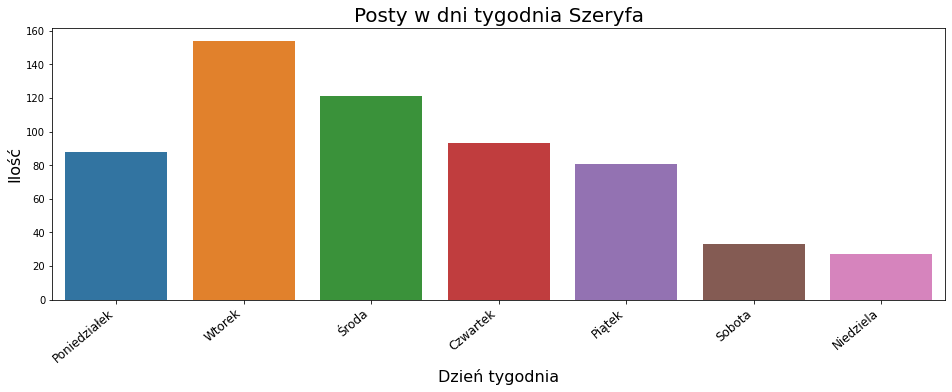

In [37]:
plt.figure(figsize=(16,5))
ax = sns.barplot(data=szeryff_df, x= "Day", y = "Count")
ax.set_ylabel('Ilość', fontsize=16)
ax.set_xlabel('Dzień tygodnia', fontsize=16)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right", fontsize=12)
ax.set_title("Posty w dni tygodnia Szeryfa", fontsize=20)
plt.show()

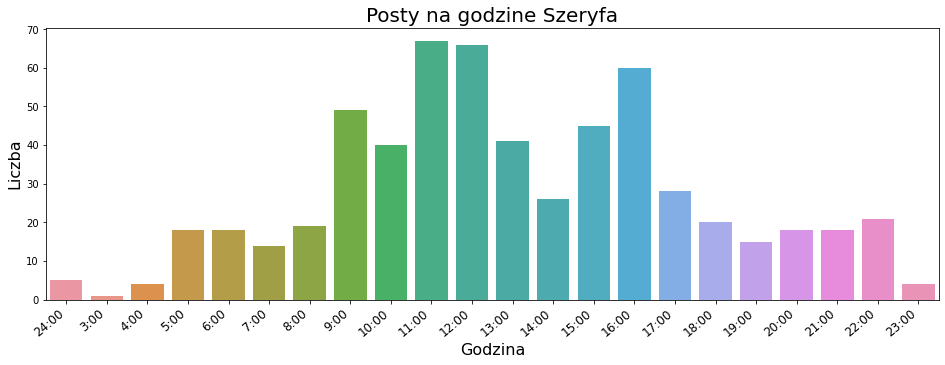

In [38]:
plt.figure(figsize=(16,5))
ax = sns.barplot(data=hours_df, x= "Hour", y = "clean_data")
ax.set_ylabel('Liczba', fontsize=16)
ax.set_xlabel('Godzina', fontsize=16)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right", fontsize=12)
ax.set_title("Posty na godzine Szeryfa", fontsize=20)
plt.show()

## Gdzie najchętniej udziela się Inwestor

In [39]:
Inwestor = dataset [dataset['Autor'] == '~Inwestor']
Inwestor_df = pd.DataFrame(Inwestor.groupby(dataset['Spolka'])['Autor'].count()).reset_index().sort_values(by=['Autor'], ascending=False)
Inwestor_df

,Spolka,Autor
11,EXCELLENC,62
29,MEDCAMP,47
25,LABOCANNA,26
39,SOLARINOV,20
23,JRHOLDING,15
21,INNOGENE,14
15,GENXONE,14
20,INFOSCAN,13
41,SYNERGA,11
0,4MASS,11


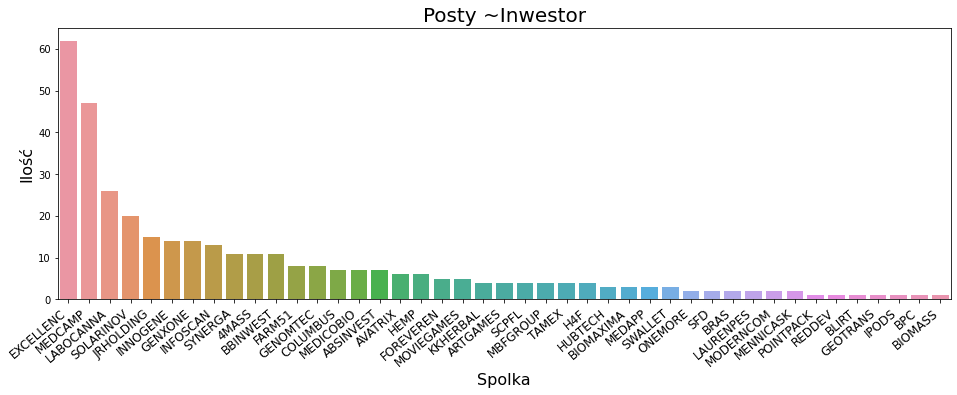

In [40]:
plt.figure(figsize=(16,5))
ax = sns.barplot(data=Inwestor_df, x= "Spolka", y = "Autor")
ax.set_ylabel('Ilość', fontsize=16)
ax.set_xlabel('Spolka', fontsize=16)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right", fontsize=12)
ax.set_title("Posty ~Inwestor", fontsize=20)
plt.show()

## Gdzie najchętniej udziela się nikt 

In [41]:
Nikt = dataset [dataset['Autor'] == '~nikt']
Nikt_df = pd.DataFrame(Nikt.groupby(dataset['Spolka'])['Autor'].count()).reset_index().sort_values(by=['Autor'], ascending=False)
Nikt_df

,Spolka,Autor
1,CREEPYJAR,270
2,DEVORAN,7
0,BIOMASS,6
3,FOREVEREN,5
4,HEMP,4
6,LABOCANNA,4
5,IPODS,3
8,REDDEV,3
9,SCPFL,2
7,LAURENPES,1


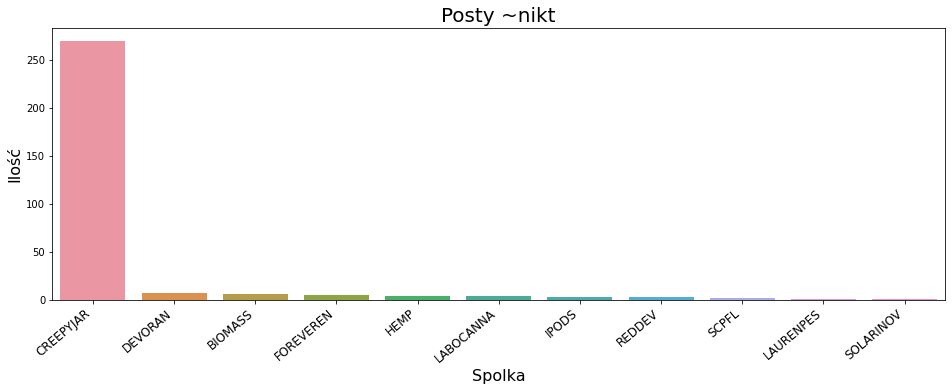

In [42]:
plt.figure(figsize=(16,5))
ax = sns.barplot(data=Nikt_df, x= "Spolka", y = "Autor")
ax.set_ylabel('Ilość', fontsize=16)
ax.set_xlabel('Spolka', fontsize=16)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right", fontsize=12)
ax.set_title("Posty ~nikt", fontsize=20)
plt.show()